# 1.4.10 Histograms in OpenCV
### cv2.calcHist(), np.histogram() etc.

##### Histograms - 1 : Find, Plot, Analyze !!!

In [1]:
# Find Histogram

In [2]:
import numpy as np
import cv2

In [3]:
img = cv2.imread('D:\GitHub\ComputerVision20212\SampleFiles\cat.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])

In [4]:
print(np.transpose(hist))

[[1.2560e+03 9.5700e+02 7.2400e+02 7.3000e+02 7.6000e+02 9.0800e+02
  8.8000e+02 9.4100e+02 1.1210e+03 1.1850e+03 1.1810e+03 1.3230e+03
  1.5050e+03 1.6910e+03 1.8300e+03 1.9980e+03 1.9430e+03 1.9750e+03
  1.9230e+03 2.0390e+03 1.9420e+03 1.9780e+03 2.0230e+03 2.0510e+03
  2.1050e+03 2.1140e+03 2.1590e+03 2.1980e+03 2.1420e+03 2.2040e+03
  2.0740e+03 2.1100e+03 2.0440e+03 2.0160e+03 2.0490e+03 1.9490e+03
  1.9390e+03 1.9280e+03 1.9250e+03 1.8290e+03 1.7490e+03 1.7560e+03
  1.7630e+03 1.6710e+03 1.7250e+03 1.6190e+03 1.6530e+03 1.5340e+03
  1.5910e+03 1.5290e+03 1.4790e+03 1.5540e+03 1.4420e+03 1.4830e+03
  1.4620e+03 1.4930e+03 1.5540e+03 1.5610e+03 1.5540e+03 1.6440e+03
  1.6230e+03 1.6770e+03 1.6500e+03 1.6550e+03 1.6660e+03 1.6770e+03
  1.8510e+03 1.7800e+03 1.9210e+03 1.8930e+03 1.9280e+03 1.9630e+03
  2.0430e+03 2.0970e+03 2.1710e+03 2.1310e+03 2.3550e+03 2.3500e+03
  2.3820e+03 2.4290e+03 2.6430e+03 2.6270e+03 2.6840e+03 2.8720e+03
  2.9710e+03 2.9820e+03 2.9410e+03 3.0760e+03 3.

In [5]:
hist = np.bincount(img.ravel(),minlength=256)

In [6]:
from matplotlib import pyplot as plt

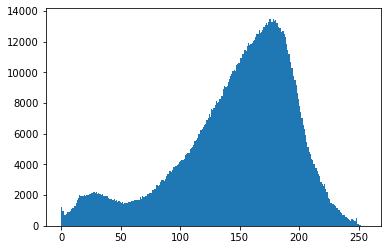

In [7]:
plt.hist(img.ravel(),256,[0,256]); plt.show()

In [8]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

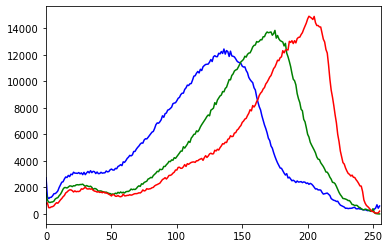

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('D:\GitHub\ComputerVision20212\SampleFiles\cat.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

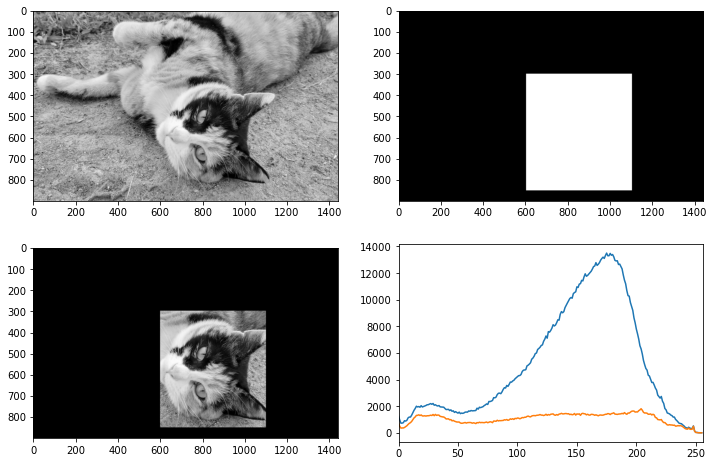

In [12]:
img = cv2.imread('D:\GitHub\ComputerVision20212\SampleFiles\cat.jpg',0)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[300:850, 600:1100] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.figure(figsize=(12,8))
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

##### Histograms - 2: Histogram Equalization

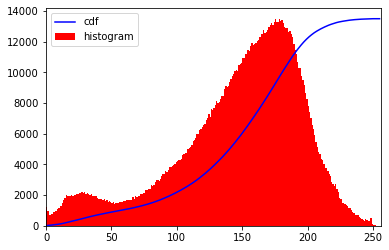

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('D:\GitHub\ComputerVision20212\SampleFiles\cat.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


In [15]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [16]:
img2 = cdf[img]

In [17]:
img = cv2.imread('D:\GitHub\ComputerVision20212\SampleFiles\cat.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('D:\GitHub\ComputerVision20212\SampleFiles\cat_res.jpg',res)

True

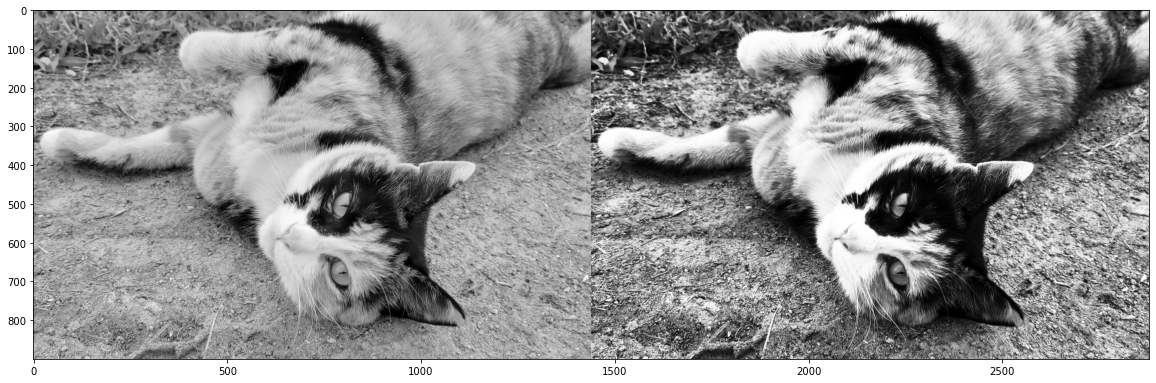

In [21]:
plt.figure(figsize = (20, 15))
plt.imshow(res, 'gray')